### 作業
請嘗試使用 flip (左右翻轉) 來做 augmentation 以降低人臉關鍵點檢測的 loss

Note: 圖像 flip 之後，groundtruth 的關鍵點也要跟著 flip 哦




### 範例
接下來的程式碼會示範如何定義一個簡單的 CNN model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 使用 colab 環境的同學請執行以下程式碼
# %tensorflow_version 1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2
# import tensorflow as tf
# print(tf.__version__)

# import os
# from google.colab import drive 
# drive.mount('/content/gdrive') # 將 google drive 掛載在 colob，
# %cd 'gdrive/My Drive'
# os.system("mkdir cupoy_cv_part4") # 可以自己改路徑
# %cd cupoy_cv_part4 # 可以自己改路徑

In [2]:
# 讀取資料集以及做前處理的函數
def load_data(dirname):
    # 讀取 csv 文件
    data = pd.read_csv(dirname)
    # 過濾有缺失值的 row
    data = data.dropna()

    # 將圖片像素值讀取為 numpy array 的形態
    data['Image'] = data['Image'].apply(lambda img: np.fromstring(img, sep=' ')).values 

    # 單獨把圖像 array 抽取出來
    imgs = np.vstack(data['Image'].values)/255
    # reshape 為 96 x 96
    imgs = imgs.reshape(data.shape[0], 96, 96)
    # 轉換為 float
    imgs = imgs.astype(np.float32)
    
    # 提取坐標的部分
    points = data[data.columns[:-1]].values

    # 轉換為 float
    points = points.astype(np.float32)

    # normalize 坐標值到 [-0.5, 0.5]
    points = points/96 - 0.5
    
    return imgs, points

In [3]:
# 讀取資料
imgs_train, points_train = load_data(dirname = 'training.csv')
print("圖像資料:", imgs_train.shape, "\n關鍵點資料:", points_train.shape)

圖像資料: (2140, 96, 96) 
關鍵點資料: (2140, 30)


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Using TensorFlow backend.
C:\Users\123\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\123\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\123\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\123\AppData\Roaming\Pyt

In [5]:
# 回傳定義好的 model 的函數
def get_model():
    # 定義人臉關鍵點檢測網路
    model = Sequential()

    # 定義神經網路的輸入
    # model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(96, 96, 1)))
    # model.add(MaxPooling2D(pool_size=2))

    # model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
    # model.add(MaxPooling2D(pool_size=2))

    # model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    # model.add(MaxPooling2D(pool_size=2))

    # model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
    # model.add(MaxPooling2D(pool_size=2))

    # model.add(Flatten())
    # model.add(Dense(512, activation='relu'))
    # model.add(Dropout(0.2))
    # model.add(Dense(512, activation='relu'))
    # model.add(Dropout(0.2))

    model.add(Conv2D(32,kernel_size=1,strides=1,activation='relu',input_shape=(96,96,1)))
    model.add(Conv2D(32,kernel_size=3,activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(32,kernel_size=1,strides=1,activation='relu',input_shape=points_train.shape))
    model.add(Conv2D(64,kernel_size=3,activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,kernel_size=3,activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(output_dim=128,activation='relu'))
    model.add(Dropout(p=0.5))
    model.add(Dense(output_dim=64,activation='relu'))
    model.add(Dropout(p=0.3))
    model.add(Dense(output_dim=30))
    # 最後輸出 30 維的向量，也就是 15 個關鍵點的值
    # model.add(Dense(30))
    return model

In [6]:
model = get_model()
# 配置 loss funtion 和 optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
C:\Users\123\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
C:\Users\123\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:35: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
C:\Users\123\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
C:\Users\123\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:37: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.3)`
C:\Users\123\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:38: UserWarning: Update your `Dense` call

In [7]:
# 印出網路結構
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 32)        1056      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 128)       73856     
__________

In [8]:
from keras.callbacks import ModelCheckpoint, History
# model checkpoint 
checkpoint = ModelCheckpoint('best_weights.h5', verbose=1, save_best_only=True)
hist = History()

In [9]:
# training the model
hist_model = model.fit(imgs_train.reshape(-1, 96, 96, 1), 
                       points_train, 
                       validation_split=0.2, batch_size=64, callbacks=[checkpoint, hist],
                       shuffle=True, epochs=150, verbose=1)
# save the model weights
model.save_weights('weights.h5')
# save the model
model.save('model.h5')

=========================] - 2s 1ms/step - loss: 7.4134e-04 - val_loss: 0.0015

Epoch 00034: val_loss improved from 0.00154 to 0.00151, saving model to best_weights.h5
Epoch 35/150
1712/1712 [==============================] - 2s 1ms/step - loss: 7.2098e-04 - val_loss: 0.0015

Epoch 00035: val_loss improved from 0.00151 to 0.00151, saving model to best_weights.h5
Epoch 36/150
1712/1712 [==============================] - 2s 1ms/step - loss: 7.1672e-04 - val_loss: 0.0015

Epoch 00036: val_loss did not improve from 0.00151
Epoch 37/150
1712/1712 [==============================] - 2s 1ms/step - loss: 6.9790e-04 - val_loss: 0.0015

Epoch 00037: val_loss improved from 0.00151 to 0.00151, saving model to best_weights.h5
Epoch 38/150
1712/1712 [==============================] - 2s 1ms/step - loss: 6.8592e-04 - val_loss: 0.0015

Epoch 00038: val_loss did not improve from 0.00151
Epoch 39/150
1712/1712 [==============================] - 2s 1ms/step - loss: 6.8697e-04 - val_loss: 0.0015

Epoch 000

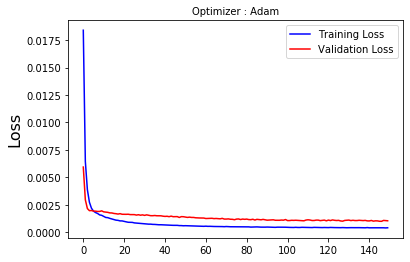

In [10]:
# loss 值的圖
plt.title('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist_model.history['loss'], color='b', label='Training Loss')
plt.plot(hist_model.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

### 觀察 model 在 testing 上的結果

In [12]:
# 讀取測試資料集
imgs_test, _ = load_data(dirname = 'test.csv')

In [13]:
# 在灰階圖像上畫關鍵點的函數
def plot_keypoints(img, points):
    plt.imshow(img, cmap='gray')
    for i in range(0,30,2):
        plt.scatter((points[i] + 0.5)*96, (points[i+1]+0.5)*96, color='red')

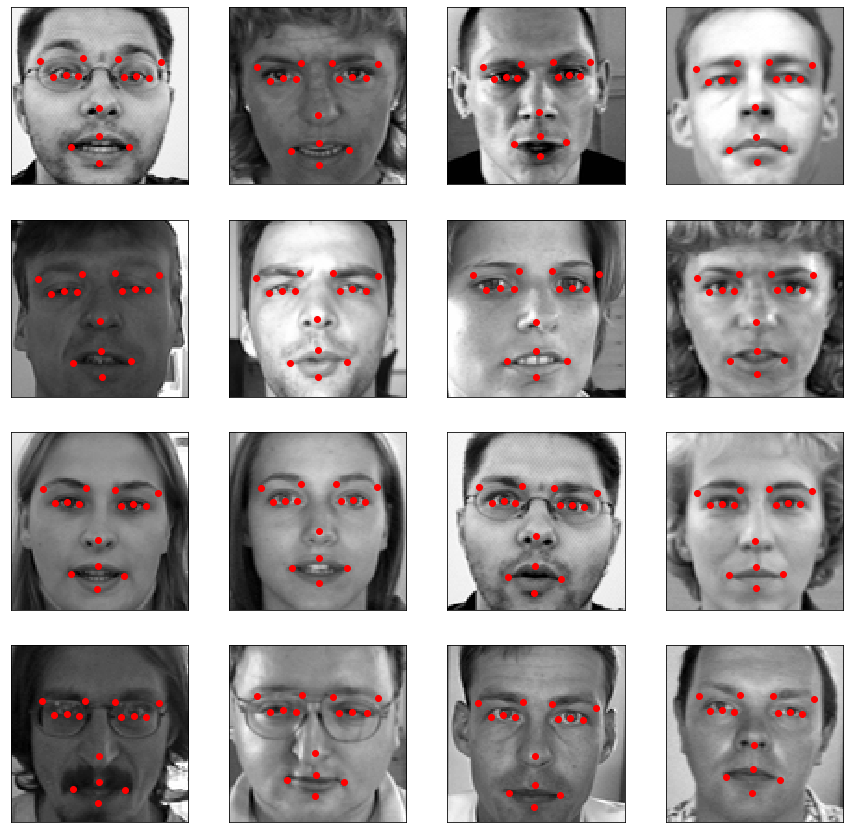

In [14]:
fig = plt.figure(figsize=(15,15))
# 在測試集圖片上用剛剛訓練好的模型做關鍵點的預測
points_test = model.predict(imgs_test.reshape(imgs_test.shape[0], 96, 96, 1))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_keypoints(imgs_test[i], np.squeeze(points_test[i]))

目前為止，大致可以觀察到，直接使用簡單的模型以及訓練方式在這組數據上應該可以在訓練集和測試集上都得到一個還不錯的結果，說明這組資料其實不會很難。

In [15]:
model_with_augment = get_model()
model_with_augment.compile(loss='mean_squared_error', optimizer='adam')

C:\Users\123\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
C:\Users\123\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:35: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
C:\Users\123\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
C:\Users\123\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:37: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.3)`
C:\Users\123\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:38: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=30)`


In [16]:
# Your code
# Your code
from imgaug import augmenters as iaa
def aug(img,point):

    seq = iaa.Sequential([
    iaa.Fliplr(0.5),
    
    
    ],random_order=True)
    seq_det = seq.to_deterministic() # 保持坐標跟圖像同步改變, 而非隨機
    img_aug=seq_det(images=img)
    point_aug=point
    # point_aug=seq_det(images=point)
    return img_aug,point_aug

In [17]:
checkpoint = ModelCheckpoint('best_weights.h5', verbose=1, save_best_only=True)
hist = History()

In [18]:
imgs_aug,points_aug=aug(imgs_train,points_train)
print(points_aug,'\n')
print(points_train)

[[ 0.18784958 -0.09372631 -0.18513533 ...  0.25974435 -0.05072179
   0.38006014]
 [ 0.17013478 -0.13572836 -0.18802837 ...  0.23194331 -0.02637589
   0.39041847]
 [ 0.17767763 -0.1363579  -0.17808554 ...  0.23116446 -0.00755262
   0.31936842]
 ...
 [ 0.21282154 -0.09737527 -0.19900149 ...  0.32336593 -0.00857565
   0.43275547]
 [ 0.16825181 -0.18029591 -0.21874064 ...  0.32605654  0.1105321
   0.3370369 ]
 [ 0.19462246 -0.14079762 -0.17932823 ...  0.29128742  0.05128509
   0.36105275]] 

[[ 0.18784958 -0.09372631 -0.18513533 ...  0.25974435 -0.05072179
   0.38006014]
 [ 0.17013478 -0.13572836 -0.18802837 ...  0.23194331 -0.02637589
   0.39041847]
 [ 0.17767763 -0.1363579  -0.17808554 ...  0.23116446 -0.00755262
   0.31936842]
 ...
 [ 0.21282154 -0.09737527 -0.19900149 ...  0.32336593 -0.00857565
   0.43275547]
 [ 0.16825181 -0.18029591 -0.21874064 ...  0.32605654  0.1105321
   0.3370369 ]
 [ 0.19462246 -0.14079762 -0.17932823 ...  0.29128742  0.05128509
   0.36105275]]


In [19]:
# training the model

hist_model = model.fit(imgs_aug.reshape(-1, 96, 96, 1), 
                       points_aug, 
                       validation_split=0.2, batch_size=64, callbacks=[checkpoint, hist],
                       shuffle=True, epochs=150, verbose=1)
# save the model weights
model.save_weights('weights.h5')
# save the model
model.save('model.h5')

===] - 2s 1ms/step - loss: 4.2527e-04 - val_loss: 0.0014

Epoch 00026: val_loss did not improve from 0.00137
Epoch 27/150
1712/1712 [==============================] - 2s 1ms/step - loss: 4.2858e-04 - val_loss: 0.0014

Epoch 00027: val_loss did not improve from 0.00137
Epoch 28/150
1712/1712 [==============================] - 2s 1ms/step - loss: 4.1753e-04 - val_loss: 0.0014

Epoch 00028: val_loss did not improve from 0.00137
Epoch 29/150
1712/1712 [==============================] - 2s 1ms/step - loss: 4.2789e-04 - val_loss: 0.0014

Epoch 00029: val_loss did not improve from 0.00137
Epoch 30/150
1712/1712 [==============================] - 2s 1ms/step - loss: 4.1670e-04 - val_loss: 0.0014

Epoch 00030: val_loss did not improve from 0.00137
Epoch 31/150
1712/1712 [==============================] - 2s 1ms/step - loss: 4.2197e-04 - val_loss: 0.0014

Epoch 00031: val_loss did not improve from 0.00137
Epoch 32/150
1712/1712 [==============================] - 2s 1ms/step - loss: 4.1542e-04 - 

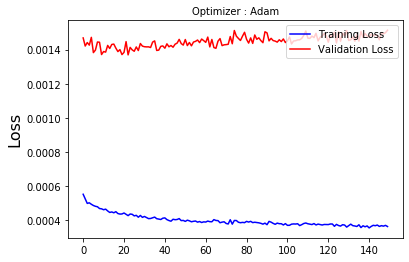

In [20]:
# loss 值的圖
plt.title('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist_model.history['loss'], color='b', label='Training Loss')
plt.plot(hist_model.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

In [21]:
# 讀取測試資料集
imgs_test, _ = load_data(dirname = 'test.csv')

In [22]:
# 在灰階圖像上畫關鍵點的函數
def plot_keypoints(img, points):
    plt.imshow(img, cmap='gray')
    for i in range(0,30,2):
        plt.scatter((points[i] + 0.5)*96, (points[i+1]+0.5)*96, color='red')

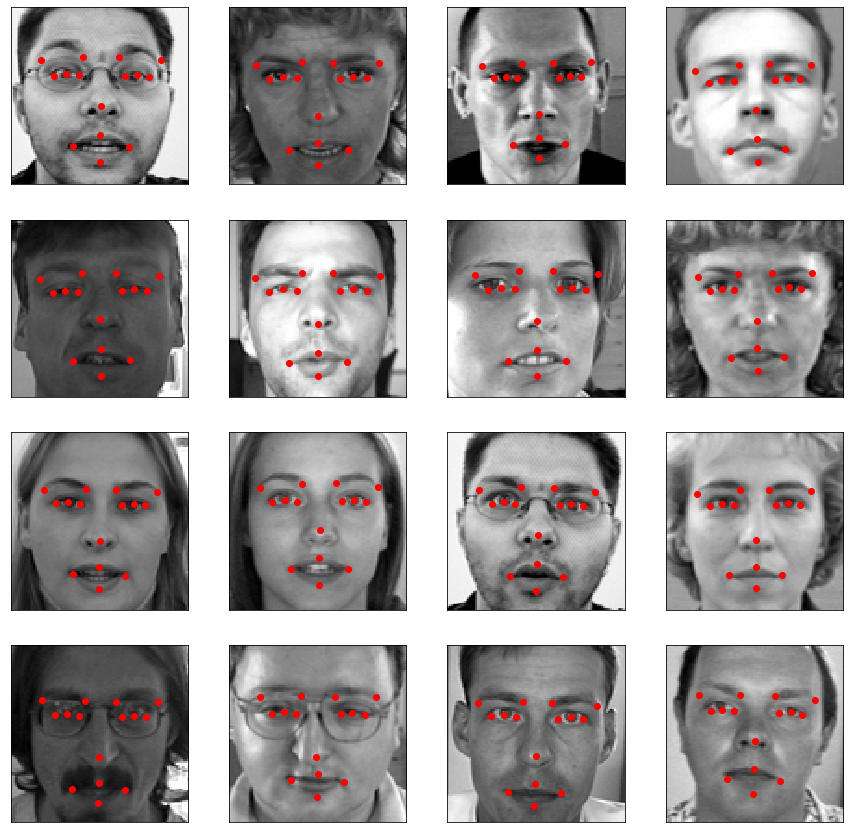

In [23]:
fig = plt.figure(figsize=(15,15))
# 在測試集圖片上用剛剛訓練好的模型做關鍵點的預測
points_test = model.predict(imgs_test.reshape(imgs_test.shape[0], 96, 96, 1))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_keypoints(imgs_test[i], np.squeeze(points_test[i]))